<a href="https://colab.research.google.com/github/kndukuba17-hub/UK-Property-Investment-Tool./blob/main/property_investment_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Generated 200 property listings for analysis.


,Property_ID,Location,Type,Listing_Price,Est_Monthly_Rent
0,PROP_1000,Leeds_Dock,2_Bed_Flat,267413,1040.0
1,PROP_1001,Manchester_CityCentre,3_Bed_House,276892,1540.0
2,PROP_1002,London_Zone2,1_Bed_Flat,407954,1550.0
3,PROP_1003,Leeds_Dock,2_Bed_Flat,281632,1280.0
4,PROP_1004,London_Zone2,2_Bed_Flat,531107,2230.0


🔄 Running Financial Models...

🎯 FOUND 102 HIGH-POTENTIAL PROPERTIES


,Property_ID,Location,Type,Listing_Price,Est_Monthly_Rent,Stamp_Duty,Total_Capital_Required,Gross_Yield_%
87,PROP_1087,Birmingham_Digbeth,3_Bed_House,272070,1580.0,9265.60,285556.30,6.97
101,PROP_1101,London_Zone2,1_Bed_Flat,538076,3120.0,30546.08,575502.84,6.96
157,PROP_1157,Manchester_CityCentre,1_Bed_Flat,263765,1530.0,8601.20,276503.85,6.96
144,PROP_1144,Leeds_Dock,3_Bed_House,389370,2250.0,18649.60,413413.30,6.93
150,PROP_1150,London_Zone2,2_Bed_Flat,521823,3000.0,29245.84,557787.07,6.90


/tmp/ipython-input-2936050994.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Gross_Yield_%', data=df, palette='Set2')


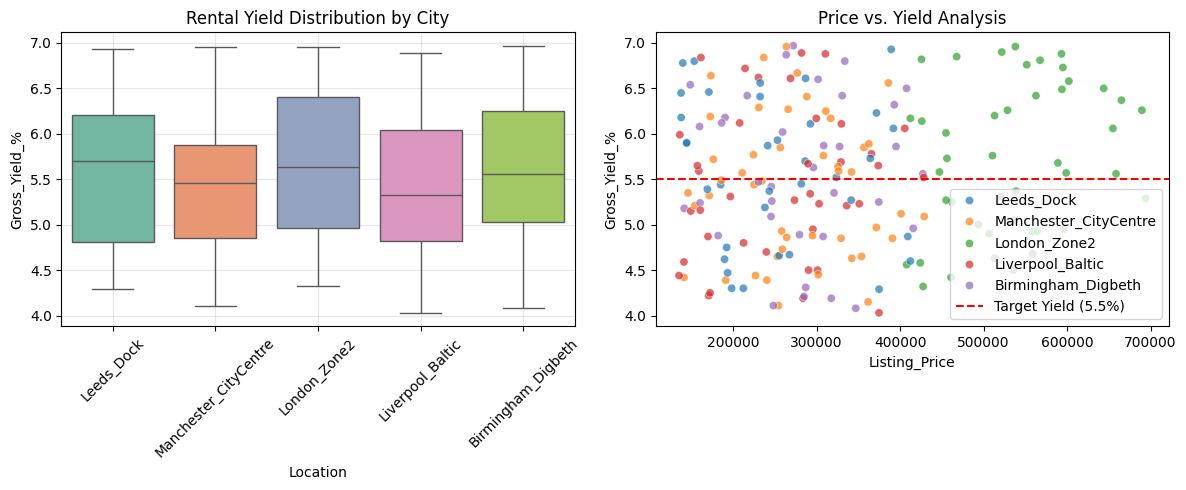

✅ Analysis Complete.


In [1]:
# ==========================================
# 🏠 UK PROPERTY INVESTMENT & YIELD CALCULATOR
# ==========================================
# Author: Kaycee Ndukuba
# Description: Automates financial viability analysis (Stamp Duty, Yield, ROI) for real estate.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# ==========================================
# PART 1: MOCK DATA GENERATION (Simulating the Scraper)
# ==========================================
# In a live environment, this block would be replaced by the BeautifulSoup scraper.
# We generate data here so this notebook is executable by recruiters without external files.

def generate_mock_listings(num_properties=100):
    locations = ['London_Zone2', 'Manchester_CityCentre', 'Birmingham_Digbeth', 'Leeds_Dock', 'Liverpool_Baltic']
    types = ['1_Bed_Flat', '2_Bed_Flat', '3_Bed_House']

    data = []
    for i in range(num_properties):
        loc = random.choice(locations)
        prop_type = random.choice(types)

        # Logic: London is expensive, North is cheaper
        base_price = 450000 if 'London' in loc else 180000
        price_variance = random.randint(-50000, 150000)
        listing_price = base_price + price_variance + (100000 if '3_Bed' in prop_type else 0)

        # Logic: Rent is proportional to price but yield varies
        est_rent = (listing_price * random.uniform(0.04, 0.07)) / 12  # 4-7% yield

        data.append({
            'Property_ID': f"PROP_{1000+i}",
            'Location': loc,
            'Type': prop_type,
            'Listing_Price': listing_price,
            'Est_Monthly_Rent': round(est_rent, -1) # Round to nearest 10
        })

    return pd.DataFrame(data)

# Generate and display initial data
df = generate_mock_listings(200)
print(f"✅ Generated {len(df)} property listings for analysis.")
display(df.head())


# ==========================================
# PART 2: FINANCIAL LOGIC ENGINES (The Core Value)
# ==========================================

def calculate_stamp_duty(price, is_additional_property=True):
    """
    Calculates UK Stamp Duty Land Tax (SDLT) based on 2024/25 thresholds.
    Includes logic for the 3% surcharge on additional properties (Investor Mode).
    """
    tax = 0
    # Surcharge for investors (3% on entire value)
    if is_additional_property:
        tax += price * 0.03

    # Standard Progressive Bands
    # Band 1: £0 - £250k (0%)
    remaining = price - 250000

    # Band 2: £250k - £925k (5%)
    if remaining > 0:
        taxable = min(remaining, 675000)
        tax += taxable * 0.05
        remaining -= 675000

    # Band 3: £925k - £1.5m (10%)
    if remaining > 0:
        taxable = min(remaining, 575000)
        tax += taxable * 0.10
        remaining -= 575000

    # Band 4: > £1.5m (12%)
    if remaining > 0:
        tax += remaining * 0.12

    return round(tax, 2)

def calculate_yield_metrics(row):
    """
    Calculates Gross Yield, Total Capital Required, and ROI.
    """
    # 1. Costs
    stamp_duty = calculate_stamp_duty(row['Listing_Price'])
    legal_fees = 1500 # Estimated standard fee
    refurb_budget = row['Listing_Price'] * 0.01 # 1% contingency

    total_investment = row['Listing_Price'] + stamp_duty + legal_fees + refurb_budget

    # 2. Income
    annual_rent = row['Est_Monthly_Rent'] * 12

    # 3. Metrics
    gross_yield = (annual_rent / row['Listing_Price']) * 100
    net_roi = ((annual_rent - (total_investment * 0.03)) / total_investment) * 100 # Assuming 3% maintenance cost

    return pd.Series([stamp_duty, total_investment, round(gross_yield, 2)])

# Apply Logic
print("🔄 Running Financial Models...")
df[['Stamp_Duty', 'Total_Capital_Required', 'Gross_Yield_%']] = df.apply(calculate_yield_metrics, axis=1)

# ==========================================
# PART 3: ANALYSIS & INVESTMENT DECISION
# ==========================================

# Filter: Identify "High Yield" Opportunities (> 5.5% Yield)
investment_shortlist = df[df['Gross_Yield_%'] > 5.5].sort_values(by='Gross_Yield_%', ascending=False)

print(f"\n🎯 FOUND {len(investment_shortlist)} HIGH-POTENTIAL PROPERTIES")
display(investment_shortlist.head(5))

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Yield by Location
plt.subplot(1, 2, 1)
sns.boxplot(x='Location', y='Gross_Yield_%', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Rental Yield Distribution by City')
plt.grid(True, alpha=0.3)

# Plot 2: Price vs Yield (The "Sweet Spot")
plt.subplot(1, 2, 2)
sns.scatterplot(x='Listing_Price', y='Gross_Yield_%', hue='Location', data=df, alpha=0.7)
plt.title('Price vs. Yield Analysis')
plt.axhline(5.5, color='r', linestyle='--', label='Target Yield (5.5%)')
plt.legend()

plt.tight_layout()
plt.show()

print("✅ Analysis Complete.")